## Linear Regression

### Part 1 - Data Preprocessing

### Importing the dataset

In [461]:
# using ISO-8859-1 for specific file importing
import pandas as pd
data = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


#### HANDLE MISSING VALUES

In [462]:
data.isnull().sum()
# identifying missing values in the dataset

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [463]:
data.dropna(axis = 1, inplace= True)
data.isnull().sum()
# dropping missing category values

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

### Check for outliers and handle them

In [464]:
import numpy as np
numeric_columns = data.select_dtypes(include= [np.number]).columns
z_scores= np.abs((data[numeric_columns] - data[numeric_columns].mean()) / data[numeric_columns].std())
z_scores

data = data[(z_scores < 3).all(axis = 1)]


### Getting the inputs and output

In [465]:
#  Convert the 'STATUS' column to numerical values 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['STATUS'] = le.fit_transform(data['STATUS'])
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,5,1,2,2003,...,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,5,2,5,2003,...,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,5,3,7,2003,...,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,5,3,8,2003,...,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,5,4,10,2003,...,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,USA,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,5,4,12,2004,...,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,Spain,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,5,1,1,2005,...,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,Finland,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,4,1,3,2005,...,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,Spain,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,5,1,3,2005,...,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,France,Roulet,Annette,Small


### Selecting relevant features and the target variable

In [466]:
# dependent Variables
X_features = ['QUANTITYORDERED', 'PRICEEACH', 'MSRP','STATUS']
X = data[X_features]
X

,QUANTITYORDERED,PRICEEACH,MSRP,STATUS
0,30,95.70,95,5
1,34,81.35,95,5
2,41,94.74,95,5
3,45,83.26,95,5
4,49,100.00,95,5
...,...,...,...,...
2818,20,100.00,54,5
2819,29,100.00,54,5
2820,43,100.00,54,4
2821,34,62.24,54,5


In [467]:
y_features = 'SALES'
y = data[y_features]
y
# independent Variable

0       2871.00
1       2765.90
2       3884.34
3       3746.70
4       5205.27
         ...   
2818    2244.40
2819    3978.51
2820    5417.57
2821    2116.16
2822    3079.44
Name: SALES, Length: 2784, dtype: float64

### Creating the Training Set and the Test Set

In [468]:
# scikitlearn is a library
# model_selection is a module
# train_test_split is a function
#trainset 80 at test set 20

from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

In [469]:
X_train

,QUANTITYORDERED,PRICEEACH,MSRP,STATUS
1312,28,58.58,87,5
456,42,100.00,141,5
2006,48,56.64,68,5
1847,31,73.62,85,5
2691,39,81.14,100,5
...,...,...,...,...
785,21,70.96,84,5
858,37,100.00,132,5
1683,33,66.49,69,5
2645,36,100.00,118,5


In [470]:
X_test

,QUANTITYORDERED,PRICEEACH,MSRP,STATUS
1459,48,47.40,57,5
584,44,100.00,170,5
113,26,100.00,136,5
2092,39,100.00,97,5
312,34,96.73,117,5
...,...,...,...,...
1248,39,100.00,143,5
1787,24,87.24,117,5
1543,37,27.22,33,5
2341,26,100.00,102,5


In [471]:
y_train

1312    1640.24
456     6182.40
2006    2718.72
1847    2282.22
2691    3164.46
         ...   
785     1490.16
858     4346.76
1683    2194.17
2645    4527.72
2771    1348.76
Name: SALES, Length: 2227, dtype: float64

In [472]:
y_test

1459    2275.20
584     7554.80
113     3854.24
2092    4424.16
312     3288.82
         ...   
1248    5096.91
1787    2093.76
1543    1007.14
2341    2600.26
506     2304.45
Name: SALES, Length: 557, dtype: float64

## Part 2 - Building and training the model

### Building the model

In [473]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()

### Training the Model

In [474]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()

In [475]:
# fit is a method inside LinearRegression class - they are like functions
model.fit(X_train, y_train)

LinearRegression()

### Inference

In [476]:
y_pred = model.predict(X_test)
y_pred

array([2736.96070072, 6003.02068787, 3784.93507231, 4485.61942713,
       4159.62372878, 4942.28761014, 2454.7233481 , 4309.56390302,
       4431.72063061, 4431.72063061, 6780.25738846, 1979.3423098 ,
       4641.54838023, 1960.46219801, 3076.14567907, 4116.7411795 ,
       2445.37183908, 2079.98620998, 4264.37571789, 3963.42063312,
       6334.82679506, 5540.76343839, 4577.51692008, 3433.24022078,
       -818.41537595, 2959.70689429, 5949.12189134, 4049.82854514,
       5172.29615377, 3810.28896483, 4569.33938852, 2450.64199348,
       4199.12041841, 3392.62823654,  769.80351833, 2297.91375486,
       4434.48543551, 4167.9346278 , 1724.69874055, 3287.08423217,
       3981.79271464, 5418.78508082, 1198.17461828, 2994.29657035,
       1626.3906233 , 1268.31122658, 6916.29759721, 5699.51665305,
       2665.67237803, 3217.01015402, 1215.999172  , 2372.48461999,
       4460.08215966, 4461.32146513,  743.93929162, 4136.61674174,
       5588.89479843, 2392.822846  , 3016.29006977,  939.07927

In [477]:
y_test

1459    2275.20
584     7554.80
113     3854.24
2092    4424.16
312     3288.82
         ...   
1248    5096.91
1787    2093.76
1543    1007.14
2341    2600.26
506     2304.45
Name: SALES, Length: 557, dtype: float64

## Part 3: Evaluating the Model

### R-Squared

In [478]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8101270573704877

### Adjusted R-Squared

In [479]:
k = X_test.shape[1]
k

4

In [480]:
n = X_test.shape[0]
n

557

In [481]:
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.8087511664818681

### ERROR MEANS SQUARED

In [482]:
#  Predict and calculate MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 533303.0383686159


### Getting the coefficients of the model

In [483]:
# Coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients

# Interpretation:
# Higher coefficients indicate stronger relationships with the target variable (Sales).


,Coefficient
QUANTITYORDERED,96.441090
PRICEEACH,38.961938
MSRP,14.180765
STATUS,24.881167


### VISUALIZATION

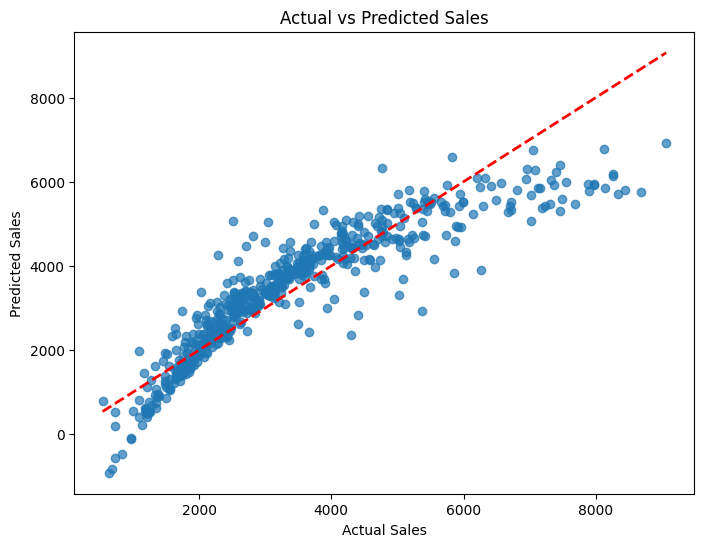

In [484]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

